basic data cleaning steps
- data types
- descriptive stats
- missing data

In [149]:
#import air quality dataset as pandas df
from rdatasets import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
air = data("airquality")

read in data and take a look, describe function

In [150]:
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [151]:
air.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


no date column, what are stats on month day?

combine to make date

In [152]:
air['Date'] = air[['Month', 'Day']].apply(lambda x: '1973-'+'-'.join(x.values.astype(str)), axis="columns")

In [155]:
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Date
0,41.0,190.0,7.4,67,5,1,1973-5-1
1,36.0,118.0,8.0,72,5,2,1973-5-2
2,12.0,149.0,12.6,74,5,3,1973-5-3
3,18.0,313.0,11.5,62,5,4,1973-5-4
4,NaN,NaN,14.3,56,5,5,1973-5-5


check data types -- oh no, not datetime

In [156]:
air.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp         int64
Month        int64
Day          int64
Date        object
dtype: object

In [159]:
air['Date'] = pd.to_datetime(air['Date'])

run descriptive stats - date nice!

OK but what about the count column? missing data

In [160]:
air.describe(datetime_is_numeric = True)

,Ozone,Solar.R,Wind,Temp,Month,Day,Date
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000,153
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922,1973-07-16 00:00:00
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000,1973-05-01 00:00:00
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000,1973-06-08 00:00:00
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000,1973-07-16 00:00:00
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000,1973-08-23 00:00:00
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000,1973-09-30 00:00:00
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520,NaN


<AxesSubplot:>

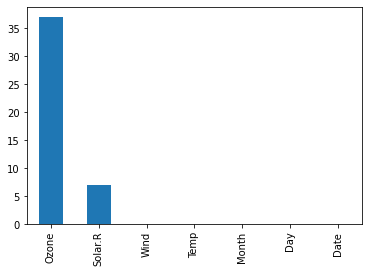

In [161]:
air.isna().sum().plot.bar()

talk about missing data strategies
- remove observations
- impute aggregate
- fill last or next
- smooth fill between last or next
- smart fill


fill w/ last in this case--often a good choice for time-based

In [130]:
air = air.ffill()

<AxesSubplot:>

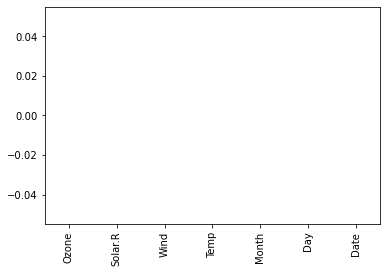

In [106]:
air.isna().sum().plot.bar()

In [64]:
air.describe(datetime_is_numeric = True)

,Ozone,Solar.R,Wind,Temp,Month,Day,Date
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153
mean,39.784314,186.032680,9.957516,77.882353,6.993464,15.803922,1973-07-16 00:00:00
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000,1973-05-01 00:00:00
25%,16.000000,112.000000,7.400000,72.000000,6.000000,8.000000,1973-06-08 00:00:00
50%,30.000000,203.000000,9.700000,79.000000,7.000000,16.000000,1973-07-16 00:00:00
75%,52.000000,259.000000,11.500000,85.000000,8.000000,23.000000,1973-08-23 00:00:00
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000,1973-09-30 00:00:00
std,31.559455,90.698707,3.523001,9.465270,1.416522,8.864520,NaN


EDA - part of the iterative process described in CRISP-DM
- look for errors
- look for patterns
- ID useful variables
- look for correlation (useful and problematic)

<AxesSubplot:xlabel='Date'>

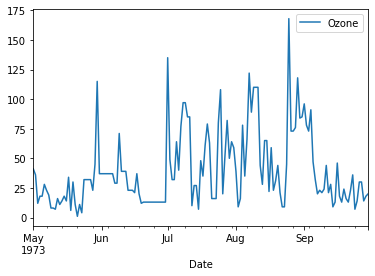

In [107]:
air.plot('Date', 'Ozone')

can see missing data

some big spikes -- maybe outliers?

no apparent drift

no obvious patterns

look another way

Month
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Ozone, dtype: object

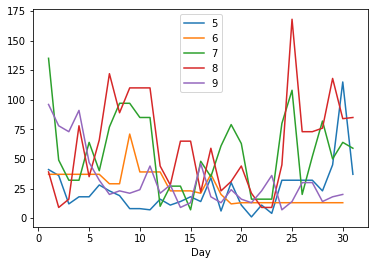

In [111]:
air.set_index('Day').groupby('Month')['Ozone'].plot(legend = "Month")

also not very meaningful

why would it be? what is our business question?

look at variables together

<AxesSubplot:xlabel='Date'>

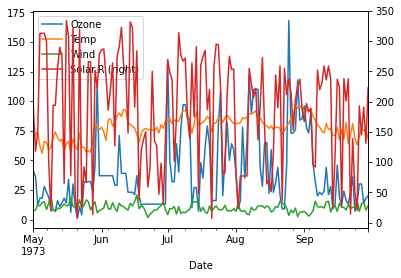

In [99]:
air.plot('Date', ['Ozone', 'Temp', 'Wind', 'Solar.R'], secondary_y = 'Solar.R')

really hard to see anything, even with scales broken out

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

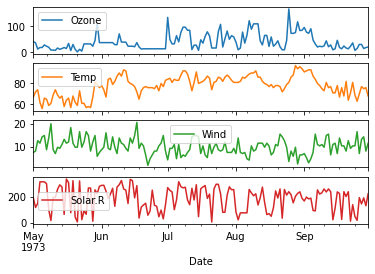

In [100]:
air.plot('Date', ['Ozone', 'Temp', 'Wind', 'Solar.R'], subplots = True)

will talk about visualization best-practices later--this is for our own use

maybe temp and ozone covary?

still hard to see--a little noisy.

moving average for denoising

In [131]:
air[['Ozone-wkly-avg', 'Temp-wkly-avg', 'Wind-wkly-avg', 'Solar-wkly-avg']]=air[['Ozone', 'Temp', 'Wind', 'Solar.R']].rolling(7).mean()

In [117]:
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Date,Ozone-wkly-avg,Temp-wkly-avg,Wind-wkly-avg,Solar-wkly-avg
0,41.0,190.0,7.4,67,5,1,1973-05-01,NaN,NaN,NaN,NaN
1,36.0,118.0,8.0,72,5,2,1973-05-02,NaN,NaN,NaN,NaN
2,12.0,149.0,12.6,74,5,3,1973-05-03,NaN,NaN,NaN,NaN
3,18.0,313.0,11.5,62,5,4,1973-05-04,NaN,NaN,NaN,NaN
4,18.0,313.0,14.3,56,5,5,1973-05-05,NaN,NaN,NaN,NaN


uh oh! but actually OK because of weekly average

In [116]:
air.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day,Date,Ozone-wkly-avg,Temp-wkly-avg,Wind-wkly-avg,Solar-wkly-avg
148,30.0,193.0,6.9,70,9,26,1973-09-26,19.857143,71.428571,10.557143,122.000000
149,30.0,145.0,13.2,77,9,27,1973-09-27,21.857143,70.714286,11.300000,114.000000
150,14.0,191.0,14.3,75,9,28,1973-09-28,22.000000,72.285714,11.542857,107.285714
151,18.0,131.0,8.0,76,9,29,1973-09-29,21.285714,73.000000,11.371429,124.000000
152,20.0,223.0,11.5,68,9,30,1973-09-30,19.000000,71.142857,11.542857,136.000000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

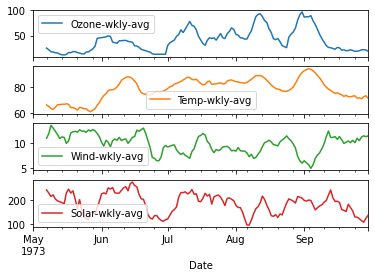

In [118]:
air.plot('Date', ['Ozone-wkly-avg', 'Temp-wkly-avg', 'Wind-wkly-avg', 'Solar-wkly-avg'], subplots = True)

combine dist over each month

Ozone         AxesSubplot(0.125,0.125;0.168478x0.755)
Solar.R    AxesSubplot(0.327174,0.125;0.168478x0.755)
Temp       AxesSubplot(0.529348,0.125;0.168478x0.755)
Wind       AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

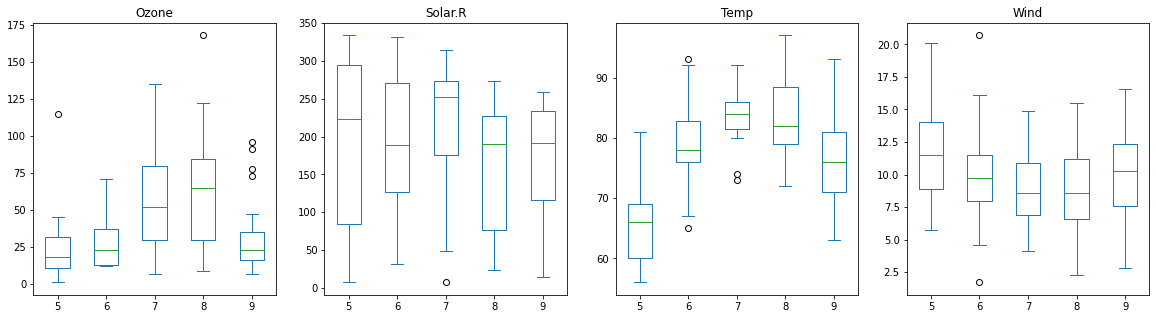

In [127]:
air.plot.box(column = ['Ozone', 'Temp', 'Wind', 'Solar.R'], by = 'Month', subplots = True, figsize = (20,5))

actually look at correlations

- ID possible predictors
- ID highly correlated variables


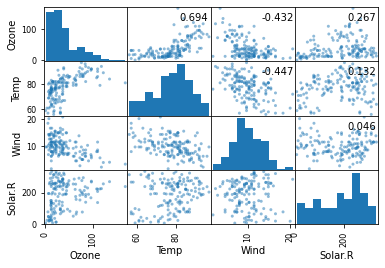

In [146]:
#https://stackoverflow.com/questions/27768677/pandas-scatter-matrix-display-correlation-coefficient
air['Day_number'] = air.reset_index().index
axes = pd.plotting.scatter_matrix(air[['Ozone', 'Temp', 'Wind', 'Solar.R']], alpha=0.5)
corr = air[['Ozone', 'Temp', 'Wind', 'Solar.R']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()